# Case 1: Heart Disease Classification
Thi, Le Thanh <br>
4/2/2018 <br>
Cognitive Systems for Health Technology Applications <br>
Helsinki Metropolia University of Applied Sciences <br>

# 1. Objectives

- To learn to read data from externals sources using panda's iofunction.
- Use keras.io dense neural networks  to make an expert system 
  to support in diagnostic decision making.


In [1124]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import models
from keras import layers

%matplotlib inline

In [1125]:
print('numpy: ', np.__version__)

numpy:  1.12.1


# Data description and preprocessing

In [1126]:
#location of the dataset

filename_switl = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
filename_clevel = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
filename_longb = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'
filename_hung = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'

# Column names for the data
colnames = ['age','sex','cp','tresbps','chol',
            'fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','thal','num']

# read data to data frame
df_switl = pd.read_csv(filename_switl, names = colnames,na_values = '?')
df_clevel = pd.read_csv(filename_clevel, names = colnames,na_values = '?')
df_longb = pd.read_csv(filename_longb, names = colnames,na_values = '?')
df_hung = pd.read_csv(filename_hung, names = colnames,na_values = '?')

In [1127]:
# Combie all the data
df= pd.concat([df_switl, df_clevel, df_longb,df_hung])

In [1128]:
# Calculate descriptive statistics
df.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [1129]:
# Check how many missing values are in each column
np.sum(np.isnan(df))


age          0
sex          0
cp           0
tresbps     59
chol        30
fbs         90
restecg      2
thalach     55
exang       55
oldpeak     62
slope      309
ca         611
thal       486
num          0
dtype: int64

In [1130]:
# Replace the missing values with column mean values
df = df.where(~np.isnan(df), df.mean(), axis='columns')

df.shape

(920, 14)

In [1131]:
# Calculate the output
labels = (df['num'] > 0).values   # O mean healthy, and 1/trure mean dissease

In [1132]:
# Input data (convert to numberical value except for the last column)
columns = ['age','sex','cp','tresbps','chol',
            'fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','thal']

data = df[columns].values
data.shape

(920, 13)

In [1133]:
# Scale the data to between 1 and 0
min_max_scaler = preprocessing.MinMaxScaler()

data_scaled =  min_max_scaler.fit_transform(data)

In [1134]:
# Check what were the scaler values
min_max_scaler.scale_

array([ 0.02040816,  1.        ,  0.33333333,  0.005     ,  0.00165837,
        1.        ,  0.5       ,  0.00704225,  1.        ,  0.11363636,
        0.5       ,  0.33333333,  0.25      ])

In [1135]:
# Check the minimum values
min_max_scaler.min_

array([-0.57142857,  0.        , -0.33333333,  0.        ,  0.        ,
        0.        ,  0.        , -0.42253521,  0.        ,  0.29545455,
       -0.5       ,  0.        , -0.75      ])

In [1136]:
# Split the data into train and validate, decise % of the data to test
x_train, x_test, y_train, y_test = train_test_split(
                data_scaled, labels, test_size=0.321)

# Modeling and compilation

In [1137]:
# Create the ANN model and train it

model =Sequential()
model.add(Dense(13, activation = 'relu', input_dim = 13))
#model.add(Dense(13, activation = 'relu'))
#model.add(Dense(13, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# Training and Validation

In [1138]:
# N = number of epochs
N = 100
h = model.fit(x_train, y_train,
              verbose = 0, 
              epochs = N,
              batch_size = 128,
              validation_data=(x_test, y_test))

# Evaluation

In [1139]:
score = model.evaluate(x_test, y_test, batch_size = 100)
score

296/296 [==============================] - 0s 64us/step


[0.43436410741226095, 0.80743242679415528]

# Results and Discussion

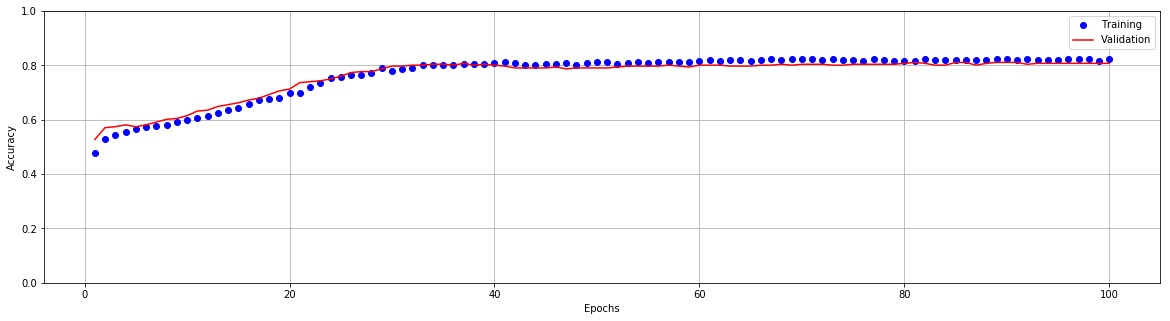

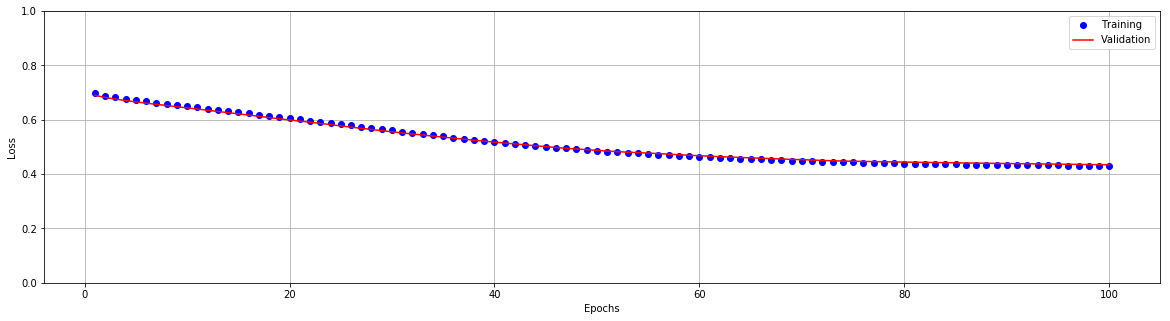

In [1140]:
# Plot the results:
epochs = range(1, N +1)
acc = h.history['acc']
val_acc = h.history ['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

In [1194]:
# Correlation the weight and input attributes
w = model.get_weights()
col= pd.DataFrame(columns, columns=['Attributes'])
W= pd.DataFrame(w[2], columns=['Weights'])
wei= pd.concat([col,W],axis=1)
print(wei,)

   Attributes   Weights
0         age  0.068525
1         sex -0.905036
2          cp  0.668940
3     tresbps -0.668681
4        chol  0.664975
5         fbs -0.739808
6     restecg -1.007854
7     thalach -0.765999
8       exang -0.690006
9     oldpeak -0.639338
10      slope  0.634858
11         ca -0.577822
12       thal -0.950299


- After tried a couple of hidden layers, I decise 1 layer with 13 cells is enough cause we only have 13 attributes and the number of layers doesn't have any affect on this data.
- I chose 32,1% data to test cause at this percentage my validation result is more stable than other number.

I'm happy with the network and start to apply it on individual dataset.

# For curiosity

Using the same preprocessing method and model on different data.

In [1142]:
# Switzerland's data
df1 = df_switl.where(~np.isnan(df_switl), df_switl.mean(), axis='columns')
data1 = df1[columns].values

data_scaled1 =  min_max_scaler.fit_transform(data1)
labels1 = (df1['num'] > 0).values
x1_train, x1_test, y1_train, y1_test = train_test_split(
                data_scaled1, labels1, test_size=0.321)

h1 = model.fit(x1_train, y1_train,
              verbose = 0, 
              epochs = N,
              batch_size = 128,
              validation_data=(x1_test, y1_test))
score1 = model.evaluate(x1_test, y1_test, batch_size = 100)

print(data1.shape)

40/40 [==============================] - 0s 0us/step
(123, 13)


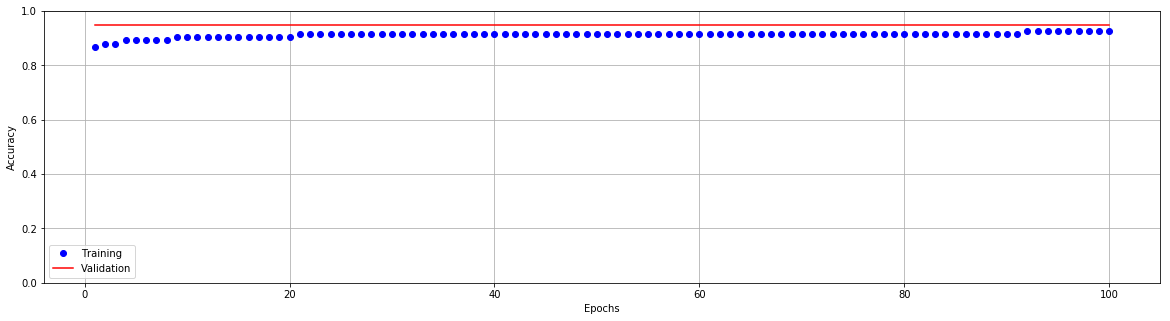

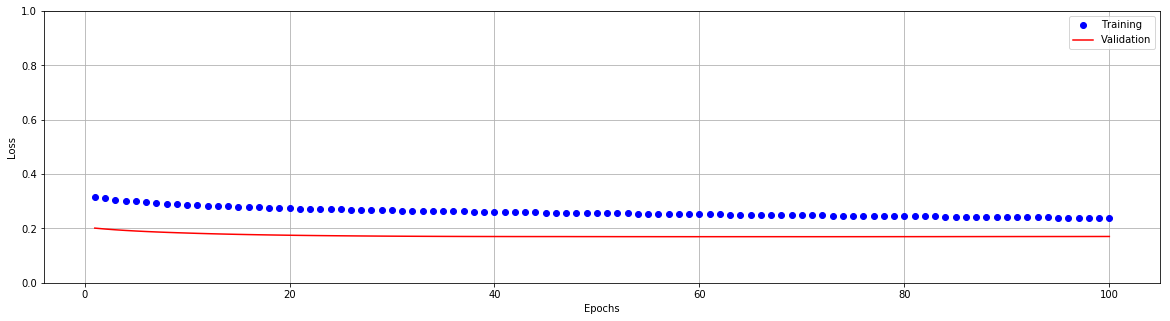

[0.17043721675872803, 0.94999998807907104]


In [1143]:
# Plot the results:
acc1 = h1.history['acc']
val_acc1 = h1.history ['val_acc']
loss1 = h1.history['loss']
val_loss1 = h1.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc1, 'bo', label='Training')
plt.plot(epochs, val_acc1, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss1, 'bo', label='Training')
plt.plot(epochs, val_loss1, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

print(score1)

In [1144]:
# Cleveland's data
df2 = df_clevel.where(~np.isnan(df_clevel), df_clevel.mean(), axis='columns')
data2 = df2[columns].values
data_scaled2 =  min_max_scaler.fit_transform(data2)
labels2 = (df2['num'] > 0).values
x2_train, x2_test, y2_train, y2_test = train_test_split(
                data_scaled2, labels2, test_size=0.321)
h2 = model.fit(x2_train, y2_train,
              verbose = 0, 
              epochs = N,
              batch_size = 128,
              validation_data=(x2_test, y2_test))
score2 = model.evaluate(x2_test, y2_test, batch_size = 100)

print(data2.shape)

98/98 [==============================] - 0s 0us/step
(303, 13)


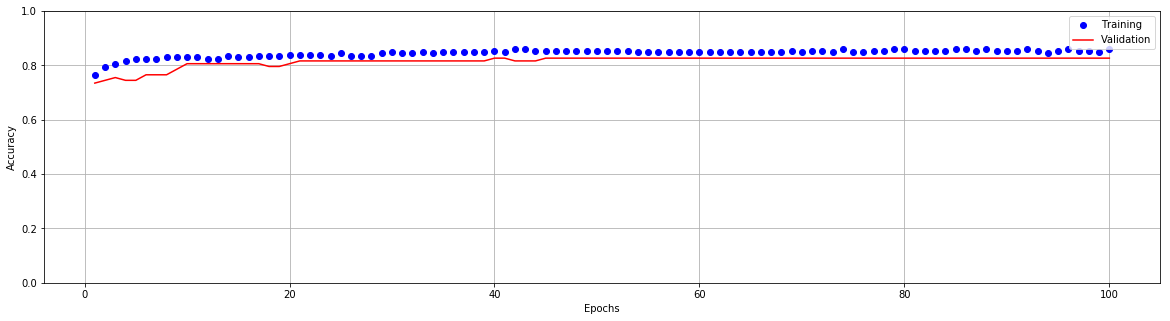

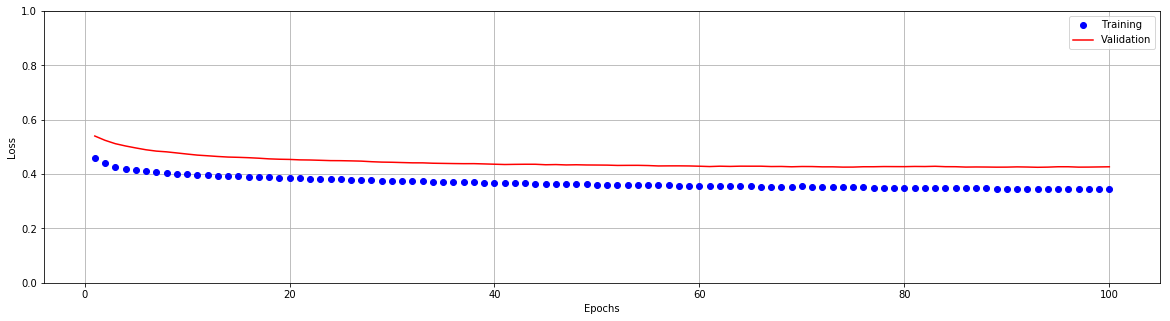

[0.4268336296081543, 0.82653063535690308]


In [1145]:
# Plot the results:
acc2 = h2.history['acc']
val_acc2 = h2.history ['val_acc']
loss2 = h2.history['loss']
val_loss2 = h2.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc2, 'bo', label='Training')
plt.plot(epochs, val_acc2, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss2, 'bo', label='Training')
plt.plot(epochs, val_loss2, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

print(score2)

In [1146]:
# Data of Long beach 
df3 = df_longb.where(~np.isnan(df_longb), df_longb.mean(), axis='columns')
data3 = df3[columns].values

data_scaled3 =  min_max_scaler.fit_transform(data3)
labels3 = (df3['num'] > 0).values
x3_train, x3_test, y3_train, y3_test = train_test_split(
                data_scaled3, labels3, test_size=0.321)
h3 = model.fit(x3_train, y3_train,
              verbose = 0, 
              epochs = N,
              batch_size = 128,
              validation_data=(x3_test, y3_test))
score3 = model.evaluate(x3_test, y3_test, batch_size = 100)

print(data3.shape)

65/65 [==============================] - 0s 15us/step
(200, 13)


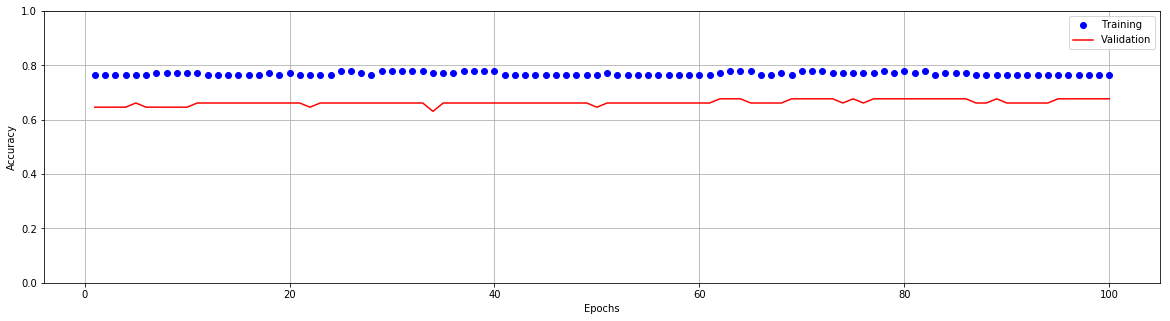

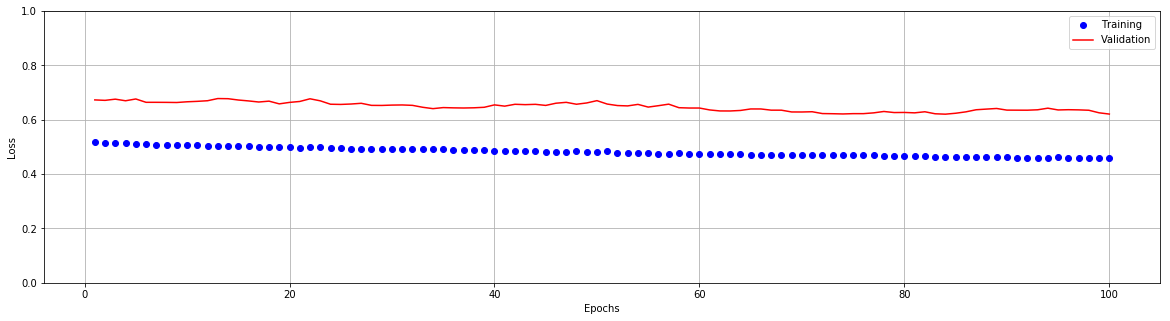

[0.62077605724334717, 0.67692309617996216]


In [1147]:
# Plot the results:
acc3 = h3.history['acc']
val_acc3 = h3.history ['val_acc']
loss3 = h3.history['loss']
val_loss3 = h3.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc3, 'bo', label='Training')
plt.plot(epochs, val_acc3, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss3, 'bo', label='Training')
plt.plot(epochs, val_loss3, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

print(score3)

In [1148]:
# Hungarian's data
df4 = df_hung.where(~np.isnan(df_hung), df_hung.mean(), axis='columns')
data4 = df4[columns].values
data_scaled4 =  min_max_scaler.fit_transform(data4)
labels4 = (df4['num'] > 0).values
x4_train, x4_test, y4_train, y4_test = train_test_split(
                data_scaled4, labels4, test_size=0.321)
h4 = model.fit(x4_train, y4_train,
              verbose = 0, 
              epochs = N,
              batch_size = 128,
              validation_data=(x4_test, y4_test))
score4 = model.evaluate(x4_test, y4_test, batch_size = 100)

print(data4.shape)

95/95 [==============================] - 0s 11us/step
(294, 13)


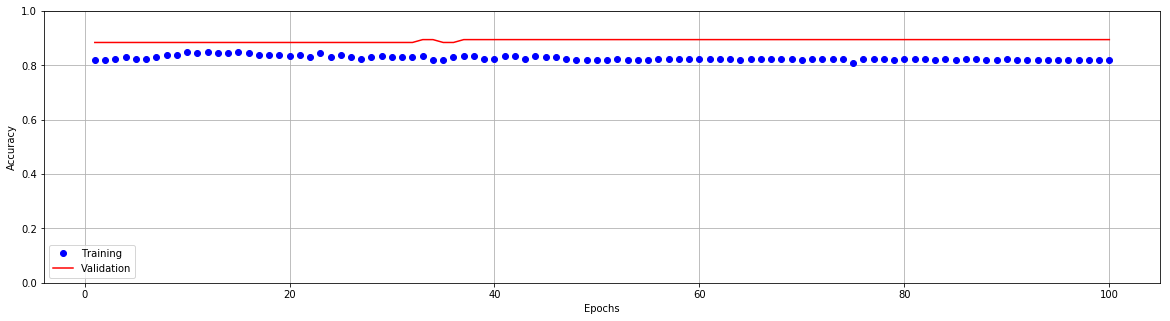

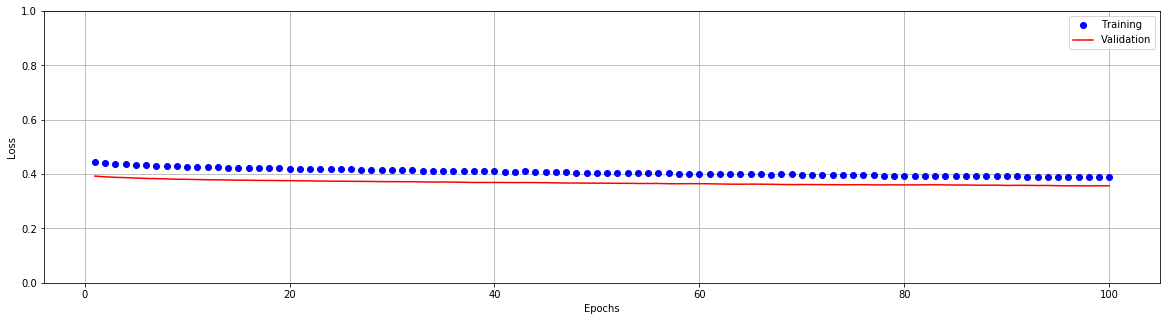

[0.3569587767124176, 0.89473682641983032]


In [1149]:
# Plot the results:
acc4 = h4.history['acc']
val_acc4 = h4.history ['val_acc']
loss4 = h4.history['loss']
val_loss4 = h4.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc4, 'bo', label='Training')
plt.plot(epochs, val_acc4, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss4, 'bo', label='Training')
plt.plot(epochs, val_loss4, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

print(score4)

In [1207]:
# compare the missing data of each dataset to see 
# the missing one relates to the accuracies of each dataset
M1=np.sum(np.isnan(df_switl))
M2 = np.sum(np.isnan(df_clevel))
M3 = np.sum(np.isnan(df_longb))
M4 =np.sum(np.isnan(df_hung))
M = pd.concat([M1, M2, M3, M4], axis=1)
M.columns = ['Switzerland', 'Cleaveland', 'Long Beach','Hungarian']
M

,Switzerland,Cleaveland,Long Beach,Hungarian
age,0,0,0,0
sex,0,0,0,0
cp,0,0,0,0
tresbps,2,0,56,1
chol,0,0,7,23
fbs,75,0,7,8
restecg,1,0,0,1
thalach,1,0,53,1
exang,1,0,53,1
oldpeak,6,0,56,0
